# Polynomial Regression

## Objectives:

1. Understanding of interaction effect in linear regression

2. Understanding how to read residuals.

3. Creating higher order terms and interaction terms by using PolynomialFeatures from sklearn.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import statsmodels.api as sm

In [2]:
advertising = pd.read_csv('data/Advertising.csv', index_col=0)

In [3]:
y = advertising.Sales
X = advertising[['TV', 'Radio']]

Let's make sure that everything is as expected.

In [4]:
X.head(3)


,TV,Radio
1,230.1,37.8
2,44.5,39.3
3,17.2,45.9


In [5]:
y.head(3)

1    22.1
2    10.4
3     9.3
Name: Sales, dtype: float64

__Your Turn__

- Use statsmodels.api to fit a linear regression model to this data.

In [8]:
import statsmodels.api as sm
model = sm.OLS(y,sm.add_constant(X)).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.897
Model:                            OLS   Adj. R-squared:                  0.896
Method:                 Least Squares   F-statistic:                     859.6
Date:                Thu, 25 Jun 2020   Prob (F-statistic):           4.83e-98
Time:                        12:40:15   Log-Likelihood:                -386.20
No. Observations:                 200   AIC:                             778.4
Df Residuals:                     197   BIC:                             788.3
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.9211      0.294      9.919      0.000       2.340       3.502
TV             0.0458      0.001     32.909      0.000       0.043       0.048
Radio          0.1880      0.008     23.382      0.000       0.172       0.204
==============================================================================
Omnibus:                       60.022   Durbin-Watson:                   2.081
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              148.679
Skew:                          -1.323   Prob(JB):                     5.19e-33
Kurtosis:                       6.292   Cond. No.                         425.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

__Your Turn__

- Find y_predict (your predictions for the cities based on the model we fitted)

In [10]:
y_predict = model.predict(sm.add_constant(X))

__Your Turn__

- Find residuals (The amount of error in your prediction for each city. Recall that the true values are in y)

In [11]:
y-y_predict

1      1.544535
2     -1.945362
3     -3.037018
4      0.882884
5     -0.323908
         ...   
196    2.235488
197    1.547625
198    0.031952
199    1.707077
200   -1.757543
Length: 200, dtype: float64

In [12]:
model.resid

1      1.544535
2     -1.945362
3     -3.037018
4      0.882884
5     -0.323908
         ...   
196    2.235488
197    1.547625
198    0.031952
199    1.707077
200   -1.757543
Length: 200, dtype: float64

## Residual Plot

In [13]:
residuals=model.resid

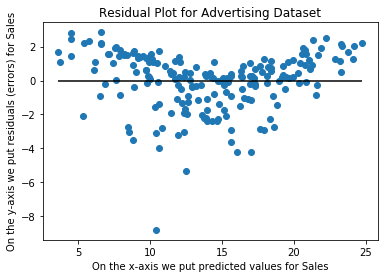

In [14]:
plt.scatter(y_predict, residuals)
plt.hlines(y = 0, xmin = y_predict.min(), xmax = y_predict.max())
plt.title('Residual Plot for Advertising Dataset')
plt.xlabel('On the x-axis we put predicted values for Sales')
plt.ylabel('On the y-axis we put residuals (errors) for Sales')
plt.show()

### Linear Regression on Advertising Dataset - Visualization

<img src = 'images/interaction.png' width = 550>

Img Source: ISLR, p81

## Adding Interaction Terms to the Model

In [15]:
# Sklearn has PolynomialFeatures class for creating higher order terms in the data
from sklearn.preprocessing import PolynomialFeatures

Recall that when we imported the class PolynomialFeatures, we should instantiate it to be able to use it. 

__Important parameters__

- Degree: Degrees of polynomials to be created. In our case we have $X_{1} = \text{TV}$ and $X_{2} = \text{Radio}$ 

if degree=2:

$$X_{1}^{2}, X_{1}  X_{2},X_{2}^{2}$$ columns will be created.

if degree=3:

$$X_{1}^{2}, X_{1}^{3}, X_{1}X_{2}, X_{1}^{2}X_{2}, X_{1}X_{2}^{2}, X_{2}^{2}, X_{2}^{3}$$


- Interaction only: It only adds interaction terms between the variables: 


$$ X_{1}X_{2} $$


Now, to understand the effect of PolynomialFeatures let's work with the columns ['TV', 'Radio' 'Newspaper]. Later on for the final model we will exclude 'Newspaper'.

In [16]:
columns = ['TV', 'Radio', 'Newspaper']

In [26]:
# Instantiate the PolynomialFeatures with some degree = 2
pf = PolynomialFeatures(degree=2)

In [22]:
p_data = pf.fit_transform(advertising[columns])
#like std scalar
#not transforming sales

#ten columns
#const
#tv
#tv2
#radio
#radio2
#newspaper
#newspaper2
#tvradio
#radionewspaper
#tvnewspaper

In [23]:
# PolynomialFeatures has a method that creates column names
p_columns = pf.get_feature_names(input_features=columns)

In [24]:
p_df = pd.DataFrame(p_data, columns=p_columns, index=y.index)

In [21]:
p_df.head()

,1,TV,Radio,Newspaper,TV^2,TV Radio,TV Newspaper,Radio^2,Radio Newspaper,Newspaper^2
1,1.0,230.1,37.8,69.2,52946.01,8697.78,15922.92,1428.84,2615.76,4788.64
2,1.0,44.5,39.3,45.1,1980.25,1748.85,2006.95,1544.49,1772.43,2034.01
3,1.0,17.2,45.9,69.3,295.84,789.48,1191.96,2106.81,3180.87,4802.49
4,1.0,151.5,41.3,58.5,22952.25,6256.95,8862.75,1705.69,2416.05,3422.25
5,1.0,180.8,10.8,58.4,32688.64,1952.64,10558.72,116.64,630.72,3410.56


__Your Turn__

- Change the parameters and understand the effect of the parameters.

1. make degree =3. How many columns added?

2. set degree = 3 and interaction_only = True. How many columns now? What happened?

3. Set degree = 10, how many columns do you have?



In [27]:
pf3 = PolynomialFeatures(degree=3)
p3_data = pf3.fit_transform(advertising[columns])
p3_columns = pf3.get_feature_names(input_features=columns)
len(p3_columns)

20

In [29]:
pf10 = PolynomialFeatures(degree=10)
p10_data = pf10.fit_transform(advertising[columns])
p10_columns = pf10.get_feature_names(input_features=columns)
len(p10_columns)
p10_columns

['1',
 'TV',
 'Radio',
 'Newspaper',
 'TV^2',
 'TV Radio',
 'TV Newspaper',
 'Radio^2',
 'Radio Newspaper',
 'Newspaper^2',
 'TV^3',
 'TV^2 Radio',
 'TV^2 Newspaper',
 'TV Radio^2',
 'TV Radio Newspaper',
 'TV Newspaper^2',
 'Radio^3',
 'Radio^2 Newspaper',
 'Radio Newspaper^2',
 'Newspaper^3',
 'TV^4',
 'TV^3 Radio',
 'TV^3 Newspaper',
 'TV^2 Radio^2',
 'TV^2 Radio Newspaper',
 'TV^2 Newspaper^2',
 'TV Radio^3',
 'TV Radio^2 Newspaper',
 'TV Radio Newspaper^2',
 'TV Newspaper^3',
 'Radio^4',
 'Radio^3 Newspaper',
 'Radio^2 Newspaper^2',
 'Radio Newspaper^3',
 'Newspaper^4',
 'TV^5',
 'TV^4 Radio',
 'TV^4 Newspaper',
 'TV^3 Radio^2',
 'TV^3 Radio Newspaper',
 'TV^3 Newspaper^2',
 'TV^2 Radio^3',
 'TV^2 Radio^2 Newspaper',
 'TV^2 Radio Newspaper^2',
 'TV^2 Newspaper^3',
 'TV Radio^4',
 'TV Radio^3 Newspaper',
 'TV Radio^2 Newspaper^2',
 'TV Radio Newspaper^3',
 'TV Newspaper^4',
 'Radio^5',
 'Radio^4 Newspaper',
 'Radio^3 Newspaper^2',
 'Radio^2 Newspaper^3',
 'Radio Newspaper^4',
 'New

## Fitting a Linear Regression Model with Polynomial Features

Now let's use degree =2 and interaction_only = True and see whether this improves our model.

In [ ]:
# This time, only use TV and Radio

In [30]:
pf = PolynomialFeatures(degree=2, interaction_only=True)

final_data = pf.fit_transform(advertising[['TV', 'Radio']])

final_cols = pf.get_feature_names(input_features=['TV', 'Radio'])
final_df = pd.DataFrame(final_data, columns=final_cols, index=y.index)

final_df.head()

,1,TV,Radio,TV Radio
1,1.0,230.1,37.8,8697.78
2,1.0,44.5,39.3,1748.85
3,1.0,17.2,45.9,789.48
4,1.0,151.5,41.3,6256.95
5,1.0,180.8,10.8,1952.64


In [31]:
model = sm.OLS(y, final_df)

In [32]:
final_model_fitted = model.fit()

In [33]:
final_model_fitted.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.968
Model:                            OLS   Adj. R-squared:                  0.967
Method:                 Least Squares   F-statistic:                     1963.
Date:                Thu, 25 Jun 2020   Prob (F-statistic):          6.68e-146
Time:                        13:08:48   Log-Likelihood:                -270.14
No. Observations:                 200   AIC:                             548.3
Df Residuals:                     196   BIC:                             561.5
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
1              6.7502      0.248     27.233      0.000       6.261       7.239
TV             0.0191      0.002     12.699      0.000       0.016       0.022
Radio          0.0289      0.009      3.241      0.001       0.011       0.046
TV Radio       0.0011   5.24e-05     20.727      0.000       0.001       0.001
==============================================================================
Omnibus:                      128.132   Durbin-Watson:                   2.224
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1183.719
Skew:                          -2.323   Prob(JB):                    9.09e-258
Kurtosis:                      13.975   Cond. No.                     1.80e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.8e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

## Residuals for the linear model with interactions

In [34]:
y_predict = final_model_fitted.predict(final_df)

In [35]:
residuals = y - y_predict

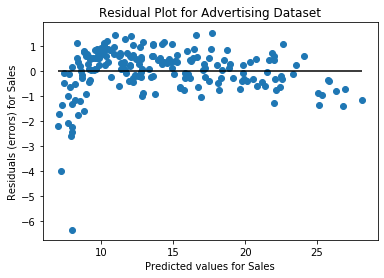

In [36]:
plt.scatter(y_predict, residuals)
plt.hlines(y = 0, xmin = y_predict.min(), xmax = y_predict.max())
plt.title('Residual Plot for Advertising Dataset')
plt.xlabel('Predicted values for Sales')
plt.ylabel('Residuals (errors) for Sales')
plt.show()

__Your Turn__

- We still see some pattern in the residuals.

- Create different datasets by changing the parameters in polynomial_features. 

- Can you improve this model?


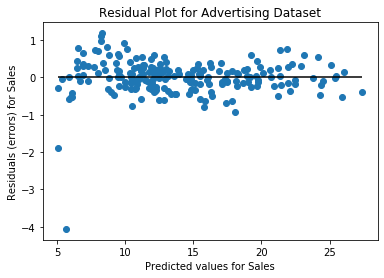

In [43]:
pf = PolynomialFeatures(degree=3, interaction_only=False)
#pf does add constant for us

final_data = pf.fit_transform(advertising[['TV', 'Radio']])

final_cols = pf.get_feature_names(input_features=['TV', 'Radio'])
final_df = pd.DataFrame(final_data, columns=final_cols, index=y.index)

model = sm.OLS(y, final_df)
final_model_fitted = model.fit()
y_predict = final_model_fitted.predict(final_df)
residuals = y - y_predict

plt.scatter(y_predict, residuals)
plt.hlines(y = 0, xmin = y_predict.min(), xmax = y_predict.max())
plt.title('Residual Plot for Advertising Dataset')
plt.xlabel('Predicted values for Sales')
plt.ylabel('Residuals (errors) for Sales')
plt.show()


In [44]:
final_model_fitted.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.991
Model:                            OLS   Adj. R-squared:                  0.991
Method:                 Least Squares   F-statistic:                     2369.
Date:                Thu, 25 Jun 2020   Prob (F-statistic):          5.75e-190
Time:                        13:20:00   Log-Likelihood:                -140.77
No. Observations:                 200   AIC:                             301.5
Df Residuals:                     190   BIC:                             334.5
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
1              4.2829      0.259     16.508      0.000       3.771       4.795
TV             0.0854      0.005     17.455      0.000       0.076       0.095
Radio          0.0425      0.027      1.586      0.114      -0.010       0.095
TV^2          -0.0004   3.25e-05    -12.892      0.000      -0.000      -0.000
TV Radio       0.0012      0.000      8.108      0.000       0.001       0.002
Radio^2       -0.0008      0.001     -0.680      0.497      -0.003       0.001
TV^3        7.349e-07   7.08e-08     10.386      0.000    5.95e-07    8.75e-07
TV^2 Radio -6.701e-07   3.78e-07     -1.775      0.078   -1.42e-06    7.48e-08
TV Radio^2 -2.867e-07   2.26e-06     -0.127      0.899   -4.75e-06    4.17e-06
Radio^3     1.306e-05   1.52e-05      0.860      0.391   -1.69e-05     4.3e-05
==============================================================================
Omnibus:                      170.571   Durbin-Watson:                   2.240
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             4776.650
Skew:                          -2.936   Prob(JB):                         0.00
Kurtosis:                      26.210   Cond. No.                     7.01e+07
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 7.01e+07. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

## Bonus: R-style formulas
Many models are based on [R-style](http://r-statistics.co/Linear-Regression.html) regression formulas.  Statsmodels can help with this!

In [45]:
import statsmodels.formula.api as smf

In [50]:
model = smf.ols(formula='Sales ~ TV + Radio + TV:Radio', data=advertising)
#OR fromula = 'Sales ~TV * Radio will give same'
#sales influenced by tV
res = model.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.968
Model:                            OLS   Adj. R-squared:                  0.967
Method:                 Least Squares   F-statistic:                     1963.
Date:                Thu, 25 Jun 2020   Prob (F-statistic):          6.68e-146
Time:                        13:31:14   Log-Likelihood:                -270.14
No. Observations:                 200   AIC:                             548.3
Df Residuals:                     196   BIC:                             561.5
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      6.7502      0.248     27.233      0.000       6.261       7.239
TV             0.0191      0.002     12.699      0.000       0.016       0.022
Radio          0.0289      0.009      3.241      0.001       0.011       0.046
TV:Radio       0.0011   5.24e-05     20.727      0.000       0.001       0.001
==============================================================================
Omnibus:                      128.132   Durbin-Watson:                   2.224
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1183.719
Skew:                          -2.323   Prob(JB):                    9.09e-258
Kurtosis:                      13.975   Cond. No.                     1.80e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.8e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""